# Lecture 5

## Neural Networks

AI neural networks are inspired by neuroscience. In the brain, neurons
are cells that are connected to each other, forming networks. Each
neuron is capable of both receiving and sending electrical signals. Once
the electrical input that a neuron receives crosses some threshold, the
neuron activates, thus sending its electrical signal forward.

An **Artificial Neural Network** is a mathematical model for learning
inspired by biological neural networks. Artificial neural networks model
mathematical functions that map inputs to outputs based on the structure
and parameters of the network. In artificial neural networks, the
structure of the network is shaped through training on data.

When implemented in AI, the parallel of each neuron is a **unit** that’s
connected to other units. For example, like in the last lecture, the AI
might map two inputs, x₁ and x₂, to whether it is going to rain today or
not. Last lecture, we suggested the following form for this hypothesis
function: *h(x₁, x₂)* = *w₀ + w₁x₁ + w₂x₂*, where *w₁* and *w₂* are
weights that modify the inputs, and *w₀* is a constant, also called
**bias**, modifying the value of the whole expression.

## Activation Functions

To use the hypothesis function to decide whether it rains or not, we
need to create some sort of threshold based on the value it produces.

One way to do this is with a step function, which gives 0 before a
certain threshold is reached and 1 after the threshold is reached.

![Step Function](https://cs50.harvard.edu/ai/2020/notes/5/step.png)

Another way to go about this is with a logistic function, which gives as
output any real number from 0 to 1, thus expressing graded confidence in
its judgment.

![Logistic Function](https://cs50.harvard.edu/ai/2020/notes/5/logistic.png)

Another possible function is Rectified Linear Unit (ReLU), which allows
the output to be any positive value. If the value is negative, ReLU sets
it to 0.

![Rectified Linear Unit](https://cs50.harvard.edu/ai/2020/notes/5/relu.png)

Whichever function we choose to use, we learned last lecture that the
inputs are modified by weights in addition to the bias, and the sum of
those is passed to an activation function. This stays true for simple
neural networks.

## Neural Network Structure

A neural network can be thought of as a representation of the idea
above, where a function sums up inputs to produce an output.

![Neural Network Structure](https://cs50.harvard.edu/ai/2020/notes/5/nnstructure.png)

The two white units on the left are the input and the unit on the right
is an output. The inputs are connected to the output by a weighted edge.
To make a decision, the output unit multiplies the inputs by their
weights in addition to the bias (*w₀*), and the uses function *g* to
determine the output.

For example, an Or logical connective can be represented as a function
*f* with the following truth table:

<span class="loading-wrap"> <span class="loading-text">Loading, please
wait</span>
<span class="animation-wrap"><span class="animation-dot"></span></span>
</span>

<table class="table table-bordered table-striped">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr>
<th data-field="0"><div class="th-inner">
<div style="text-align: left">
<em>x</em>
</div>
</div>
<div class="fht-cell">
&#10;</div></th>
<th data-field="1"><div class="th-inner">
<div style="text-align: left">
<em>y</em>
</div>
</div>
<div class="fht-cell">
&#10;</div></th>
<th data-field="2"><div class="th-inner">
<div style="text-align: left">
<em>f(x, y)</em>
</div>
</div>
<div class="fht-cell">
&#10;</div></th>
</tr>
</thead>
<tbody>
<tr data-index="0">
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr data-index="1">
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr data-index="2">
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr data-index="3">
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</tbody>
</table>

We can visualize this function as a neural network. *x₁* is one input
unit, and *x₂* is another input unit. They are connected to the output
unit by an edge with a weight of 1. The output unit then uses function
*g(-1 + 1x₁ + 2x₂)* with a threshold of 0 to output either 0 or 1 (false
or true).

![Neural Network of Or Function](https://cs50.harvard.edu/ai/2020/notes/5/nnor.png)

For example, in the case where *x₁* = *x₂* = 0, the sum is (-1). This is
below the threshold, so the function *g* will output 0. However, if
either or both of *x₁* or *x₂* are equal to 1, then the sum of all
inputs will be either 0 or 1. Both are at or above the threshold, so the
function will output 1.

A similar process can be repeated with the And function (where the bias
will be (-2)). Moreover, inputs and outputs don’t have to be distinct. A
similar process can be used to take humidity and air pressure as input,
and produce the probability of rain as output. Or, in a different
example, inputs can be money spent on advertising and the month when it
was spent to get the output of expected revenue from sales. This can be
extended to any number of inputs by multiplying each input *x₁ … xₙ* by
weight *w₁ … wₙ*, summing up the resulting values and adding a bias
*w₀*.

## Gradient Descent

Gradient descent is an algorithm for minimizing loss when training
neural networks. As was mentioned earlier, a neural network is capable
of inferring knowledge about the structure of the network itself from
the data. Whereas, so far, we defined the different weights, neural
networks allow us to compute these weights based on the training data.
To do this, we use the gradient descent algorithm, which works the
following way:

- Start with a random choice of weights.
    This is our naive starting place, where we don’t know how much we
    should weight each input.
- Repeat:
  - Calculate the gradient based on all
        data points that will lead to decreasing loss. Ultimately, the
        gradient is a vector (a sequence of numbers).
  - Update weights according to the
        gradient.

The problem with this kind of algorithm is that it requires to calculate
the gradient based on *all data points*, which is computationally
costly. There are a multiple ways to minimize this cost. For example, in
**Stochastic Gradient Descent**, the gradient is calculated based on one
point chosen at random. This kind of gradient can be quite inaccurate,
leading to the **Mini-Batch Gradient Descent** algorithm, which computes
the gradient based on on a few points selected at random, thus finding a
compromise between computation cost and accuracy. As often is the case,
none of these solutions is perfect, and different solutions might be
employed in different situations.

Using gradient descent, it is possible to find answers to many problems.
For example, we might want to know more than “will it rain today?” We
can use some inputs to generate probabilities for different kinds of
weather, and then just choose the weather that is most probable.

![Neural Network for Weather](https://cs50.harvard.edu/ai/2020/notes/5/weather.png)

This can be done with any number of inputs and outputs, where each input
is connected to each output, and where the outputs represent decisions
that we can make. Note that in this kind of neural networks the outputs
are not connected. This means that each output and its associated
weights from all the inputs can be be seen as an individual neural
network and thus can be trained separately from the rest of the outputs.

So far, our neural networks relied on **perceptron** output units. These
are units that are only capable of learning a linear decision boundary,
using a straight line to separate data. That is, based on a linear
equation, the perceptron could classify an input to be one type or
another (e.g. left picture). However, often, data are not linearly
separable (e.g. right picture). In this case, we turn to multilayer
neural networks to model data non-linearly.

![Linear and Non-Linear Models](https://cs50.harvard.edu/ai/2020/notes/5/linearnonlinear.png)

## Multilayer Neural Networks

A multilayer neural network is an artificial neural network with an
input layer, an output layer, and at least one **hidden** layer. While
we provide inputs and outputs to train the model, we, the humans, don’t
provide any values to the units inside the hidden layers. Each unit in
the first hidden layer receives a weighted value from each of the units
in the input layer, performs some action on it and outputs a value. Each
of these values is weighted and further propagated to the next layer,
repeating the process until the output layer is reached. Through hidden
layers, it is possible to model non-linear data.

![Multilayer Neural Network](https://cs50.harvard.edu/ai/2020/notes/5/multilayer.png)

## Backpropagation

Backpropagation is the main algorithm used for training neural networks
with hidden layers. It does so by starting with the errors in the output
units, calculating the gradient descent for the weights of the previous
layer, and repeating the process until the input layer is reached. In
pseudocode, we can describe the algorithm as follows:

- Calculate error for output layer
- For each layer, starting with output
    layer and moving inwards towards earliest hidden layer:
  - Propagate error back one layer. In
        other words, the current layer that’s being considered sends the
        errors to the preceding layer.
  - Update weights.

This can be extended to any number of hidden layers, creating **deep
neural networks**, which are neural networks that have more than one
hidden layer.

![Deep Neural Network](https://cs50.harvard.edu/ai/2020/notes/5/deepnn.png)

## Overfitting

Overfitting is the danger of modeling the training data too closely,
thus failing to generalize to new data. One way to combat overfitting is
by **dropout**. In this technique, we temporarily remove units that we
select at random during the learning phase. This way, we try to prevent
over-reliance on any one unit in the network. Throughout training, the
neural network will assume different forms, each time dropping some
other units and then using them again:

![Dropout](https://cs50.harvard.edu/ai/2020/notes/5/dropout.png)

Note that after the training is finished, the whole neural network will
be used again.

## TensorFlow

Like often is the case in python, multiple libraries already have an
implementation for neural networks using the backpropagation algorithm,
and TensorFlow is one such library. You are welcome to experiment with
TensorFlow neural networks in this [web
application](http://playground.tensorflow.org/), which lets you define
different properties of the network and run it, visualizing the output.
We will now turn to an example of how we can use TensorFlow to perform
the task we discussed last lecture: distinguishing counterfeit notes
from genuine notes.

In [5]:
import csv

import tensorflow as tf
from sklearn.model_selection import train_test_split

We import TensorFlow and call it tf (to make the code shorter).

In [6]:
# Read data in from file
with open("banknotes/banknotes.csv") as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": 1 if row[4] == "0" else 0
        })

# Separate data into training and testing groups
evidence = [row["evidence"] for row in data]
labels = [row["label"] for row in data]
X_training, X_testing, y_training, y_testing = train_test_split(
    evidence, labels, test_size=0.4
)

We provide the CSV data to the model. Our work is often required in
making the data fit the format that the library requires. The difficult
part of actually coding the model is already implemented for us.

In [7]:
# Create a neural network
model = tf.keras.models.Sequential()

Keras is an api that different machine learning algorithms access. A
sequential model is one where layers follow each other (like the ones we
have seen so far).

In [8]:
# Add a hidden layer with 8 units, with ReLU activation
model.add(tf.keras.layers.Dense(8, input_shape=(4,), activation="relu"))

A dense layer is one where each node in the current layer is connected
to all the nodes from the previous layer. In generating our hidden
layers we create 8 dense layers, each having 4 input neurons, using the
ReLU activation function mentioned above.

In [9]:
# Add output layer with 1 unit, with sigmoid activation
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In our output layer, we want to create one dense layer that uses a
sigmoid activation function, an activation function where the output is
a value between 0 and 1.

In [10]:
# Train neural network
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_training, y_training, epochs=20)

# Evaluate how well model performs
model.evaluate(X_testing, y_testing, verbose=2)

Epoch 1/20
26/26 [==============================] - 0s 649us/step - loss: 1.3290 - accuracy: 0.2017
Epoch 2/20
26/26 [==============================] - 0s 589us/step - loss: 1.0877 - accuracy: 0.2394
Epoch 3/20
26/26 [==============================] - 0s 562us/step - loss: 0.9076 - accuracy: 0.3171
Epoch 4/20
26/26 [==============================] - 0s 536us/step - loss: 0.7893 - accuracy: 0.4459
Epoch 5/20
26/26 [==============================] - 0s 514us/step - loss: 0.7058 - accuracy: 0.5456
Epoch 6/20
26/26 [==============================] - 0s 538us/step - loss: 0.6342 - accuracy: 0.6002
Epoch 7/20
26/26 [==============================] - 0s 521us/step - loss: 0.5685 - accuracy: 0.6501
Epoch 8/20
26/26 [==============================] - 0s 525us/step - loss: 0.5074 - accuracy: 0.6731
Epoch 9/20
26/26 [==============================] - 0s 512us/step - loss: 0.4528 - accuracy: 0.7096
Epoch 10/20
26/26 [==============================] - 0s 521us/step - loss: 0.4060 - accuracy: 0.7655

[0.18779660761356354, 0.9581056237220764]

Finally, we compile the model, specifying which algorithm should
optimize it, what type of loss function we use, and how we want to
measure its success (in our case, we are interested in the accuracy of
the output). Finally, we fit the model on the training data with 20
repetitions (epochs), and then evaluate it on the testing data.

## Computer Vision

Computer vision encompasses the different computational methods for
analyzing and understanding digital images, and it is often achieved
using neural networks. For example, computer vision is used when social
media employs face recognition to automatically tag people in pictures.
Other examples are handwriting recognition and self-driving cars.

Images consist of pixels, and pixels are represented by three values
that range from 0 to 255, one for red, one for green and one for blue.
These values are often referred to with the acronym RGB. We can use this
to create a neural network where each color value in each pixel is an
input, where we have some hidden layers, and the output is some number
of units that tell us what it is that was shown in the image. However,
there are a few drawbacks to this approach. First, by breaking down the
image into pixels and the values of their colors, we can’t use the
structure of the image as an aid. That is, as humans, if we see a part
of a face we know to expect to see the rest of the face, and this
quickens computation. We want to be able to use a similar advantage in
our neural networks. Second, the sheer number of inputs is very big,
which means that we will have to calculate a lot of weights.

## Image Convolution

Image convolution is applying a filter that adds each pixel value of an
image to its neighbors, weighted according to a kernel matrix. Doing so
alters the image and can help the neural network process it.

Let’s consider the following example:

![Image Convolution](https://cs50.harvard.edu/ai/2020/notes/5/convolution.png)

The kernel is the blue matrix, and the image is the big matrix on the
left. The resulting filtered image is the small matrix on the bottom
right. To filter the image with the kernel, we start with the pixel with
value 20 in the top-left of the image (coordinates 1,1). Then, we will
multiply all the values around it by the corresponding value in the
kernel and sum them up (10\*0 + 20\*(-1) + 30\*0 + 10\*(-1) + 20\*5 +
30\*(-1) + 20\*0 + 30\*(-1) + 40\*0), producing the value 10. Then we
will do the same for the pixel on the right (30), the pixel below the
first one (30), and the pixel to the right of this one (40). This
produces a filtered image with the values we see on the bottom right.

Different kernels can achieve different tasks. For edge detection, the
following kernel is often used:

![Edge Detection Kernel](https://cs50.harvard.edu/ai/2020/notes/5/kernel.png)

The idea here is that when the pixel is similar to all its neighbors,
they should cancel each other, giving a value of 0. Therefore, the more
similar the pixels, the darker the part of the image, and the more
different they are the lighter it is. Applying this kernel to an image
(left) results in an image with pronounced edges (right):

![Edge Detection](https://cs50.harvard.edu/ai/2020/notes/5/edgedetection.png)

Let’s consider an implementation of image convolution. We are using the
PIL library (stands for Python Imaging Library) that can do most of the
hard work for us.

```python
import math
import sys

from PIL import Image, ImageFilter

# Ensure correct usage
if len(sys.argv) != 2:
    sys.exit("Usage: python filter.py filename")

# Open image
image = Image.open(sys.argv[1]).convert("RGB")

# Filter image according to edge detection kernel
filtered = image.filter(ImageFilter.Kernel(
    size=(3, 3),
    kernel=[-1, -1, -1, -1, 8, -1, -1, -1, -1],
    scale=1
))

# Show resulting image
filtered.show()
```

In [24]:
!python convolution/filter.py convolution/bridge.png

Figure(640x480)


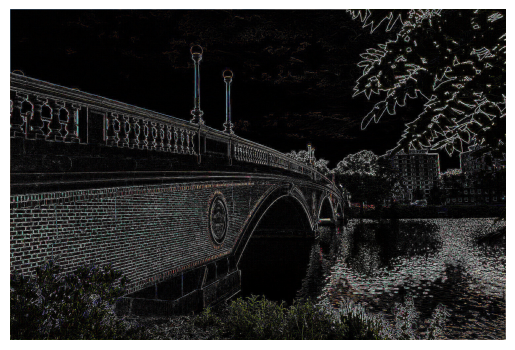

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file
img = Image.open('convolution/filtered_image.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

Still, processing the image in a neural network is computationally
expensive due to the number of pixels that serve as input to the neural
network. Another way to go about this is **Pooling**, where the size of
the input is reduced by sampling from regions in the input. Pixels that
are next to each other belong to the same area in the image, which means
that they are likely to be similar. Therefore, we can take one pixel to
represent a whole area. One way of doing this is with **Max-Pooling**,
where the selected pixel is the one with the highest value of all others
in the same region. For example, if we divide the left square (below)
into four 2X2 squares, by max-pooling from this input, we get the small
square on the right.

![Max-Pooling](https://cs50.harvard.edu/ai/2020/notes/5/maxpooling.png)

## Convolutional Neural Networks

A convolutional neural network is a neural network that uses
convolution, usually for analyzing images. It starts by applying filters
that can help distill some features of the image using different
kernels. These filters can be improved in the same way as other weights
in the neural network, by adjusting their kernels based on the error of
the output. Then, the resulting images are pooled, after which the
pixels are fed to a traditional neural network as inputs (a process
called **flattening**).

![Convolutional Neural Network](https://cs50.harvard.edu/ai/2020/notes/5/convolutionalnn.png)

The convolution and pooling steps can be repeated multiple times to
extract additional features and reduce the size of the input to the
neural network. One of the benefits of these processes is that, by
convoluting and pooling, the neural network becomes less sensitive to
variation. That is, if the same picture is taken from slightly different
angles, the input for convolutional neural network will be similar,
whereas, without convolution and pooling, the input from each image
would be vastly different.

In code, a convolutional neural network doesn’t differ by much from a
traditional neural network. TensorFlow offers datasets to test our
models on. We will be using MNIST, which contains pictures of black and
white handwritten digits. We will train our convolutional neural network
to recognize digits.

In [16]:
import sys

import tensorflow as tf

# Use MNIST handwriting dataset
mnist = tf.keras.datasets.mnist

# Prepare data for training
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = x_train.reshape(
    x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
)
x_test = x_test.reshape(
    x_test.shape[0], x_test.shape[1], x_test.shape[2], 1
)

# Create a convolutional neural network
model = tf.keras.models.Sequential([

    # Convolutional layer. Learn 32 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(28, 28, 1)
    ),

    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

# Train neural network
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=10)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10


2024-07-19 08:31:01.935571: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2613 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1078 - accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0832 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0663 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0579 - accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0501 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0382 - accuracy: 0.9871
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9887
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0312 - accurac

[0.03893917053937912, 0.9894999861717224]

Since the model takes time to train, we can save the already trained
model to use it later.

In [17]:
# Save model to file
if len(sys.argv) == 2:
    filename = sys.argv[1]
    model.save(filename)
    print(f"Model saved to {filename}.")

INFO:tensorflow:Assets written to: --f=/home/vscode/.local/share/jupyter/runtime/kernel-v2-445L097fdWo5YpA.json/assets


INFO:tensorflow:Assets written to: --f=/home/vscode/.local/share/jupyter/runtime/kernel-v2-445L097fdWo5YpA.json/assets


Model saved to --f=/home/vscode/.local/share/jupyter/runtime/kernel-v2-445L097fdWo5YpA.json.


Now, if we run a program that receives hand-drawn digits as input, it
will be able to classify and output the digit using the model. For an
implementation of such a program, refer to recognition.py in the source
code for this lecture.

## Recurrent Neural Networks

**Feed-Forward Neural Networks** are the type of neural networks that we
have discussed so far, where input data is provided to the network,
which eventually produces some output. A diagram of how feed-forward
neural networks work can be seen below.

![Feed-Forward Neural Networks Diagram](https://cs50.harvard.edu/ai/2020/notes/5/ffnndiagram.png)

As opposed to that, **Recurrent Neural Networks** consist of a
non-linear structure, where the network uses its own output as input.
For example, Microsoft’s [captionbot](https://www.captionbot.ai) is
capable of describing the content of an image with words in a sentence.
This is different from classification in that the output can be of
varying length based on the properties of the image. While feed-forward
neural networks are incapable of varying the number of outputs,
recurrent neural networks are capable to do that due to their structure.
In the captioning task, a network would process the input to produce an
output, and then continue processing from that point on, producing
another output, and repeating as much as necessary.

![Recurrent Neural Network](https://cs50.harvard.edu/ai/2020/notes/5/recurrent.png)

Recurrent neural networks are helpful in cases where the network deals
with sequences and not a single individual object. Above, the neural
network needed to produce a sequence of words. However, the same
principle can be applied to analyzing video files, which consist of a
sequence of images, or in translation tasks, where a sequence of inputs
(words in the source language) is processed to produce a sequence of
outputs (words in the target language).